In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [121]:
df = pd.read_csv("consumo_casa.csv")


df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Dia'] = df['Fecha'].dt.day
df['Hora'] = df['Fecha'].dt.hour
df['Minuto'] = df['Fecha'].dt.minute

del df['Unnamed: 0']
del df['Fecha']

columnas = df.columns.tolist()
ultimas_tres_columnas = columnas[-3:]
nuevas_columnas = ultimas_tres_columnas + columnas[:-3]
df = df[nuevas_columnas]
df

,Dia,Hora,Minuto,Medidor [W],Refrigerator,Clothes washer,Clothes Iron,Computer,Oven,Play,TV,Sound system
0,7,0,0,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,7,0,1,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,7,0,2,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,7,0,3,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,7,0,4,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
194118,22,23,55,88.272,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4
194119,22,23,56,86.386,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6
194120,22,23,57,85.766,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6
194121,22,23,58,87.665,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0


In [122]:
df.columns = df.columns.str.replace(' ', '')

In [123]:
df = df.rename(columns={'Medidor[W]': 'Medidor'})
df

,Dia,Hora,Minuto,Medidor,Refrigerator,Clotheswasher,ClothesIron,Computer,Oven,Play,TV,Soundsystem
0,7,0,0,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,7,0,1,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,7,0,2,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,7,0,3,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,7,0,4,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
194118,22,23,55,88.272,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4
194119,22,23,56,86.386,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6
194120,22,23,57,85.766,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6
194121,22,23,58,87.665,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0


In [134]:
dia1 = df[df["Dia"] == 1]

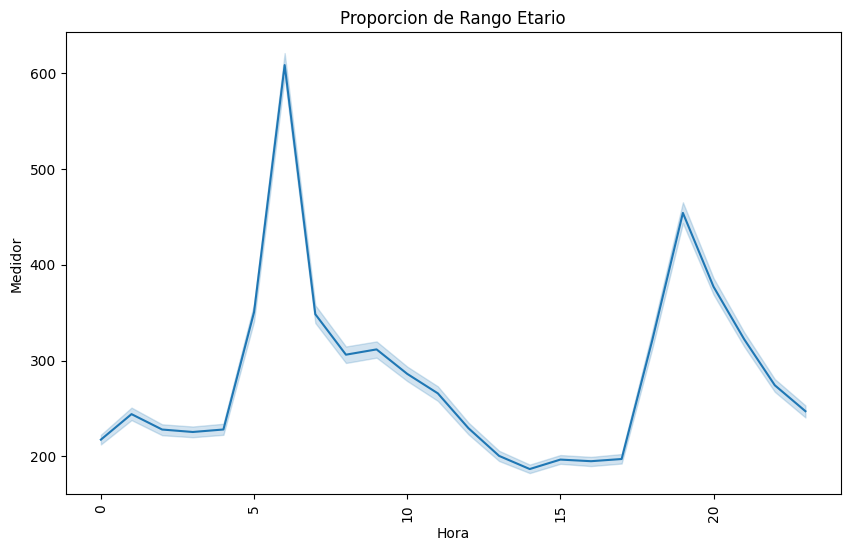

In [137]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Hora", y="Medidor")
plt.xticks(rotation=90)
plt.title('Proporcion de Rango Etario')
plt.show()

In [86]:
df1 = df.iloc[:, :4] # Selecciona las dos primeras columnas
df2 = df.iloc[:, 4:] # Selecciona las columnas desde la tercera en adelante

In [96]:
X = df1
y = df2.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0) # 0.25 * 0.8 = 0.2

In [97]:
model_preds = []
def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])
    print ("The R-Squared Value is: ", r2)
    print ("Adjusted R-Squared Value is: ", adj_r2)
    print("The Mean Squared error (MSE) is: ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("Mean Absolute Error (MAE) is: ", mae)

In [138]:
df

,Dia,Hora,Minuto,Medidor,Refrigerator,Clotheswasher,ClothesIron,Computer,Oven,Play,TV,Soundsystem
0,7,0,0,228.887,134.6,1.0,0.0,0.3,0.1,0.0,0.0,0.1
1,7,0,1,231.814,134.6,0.2,0.0,0.3,0.2,0.0,0.0,0.1
2,7,0,2,230.971,131.3,0.3,0.0,0.3,0.0,0.0,0.0,1.0
3,7,0,3,231.878,131.3,0.0,0.5,0.1,0.0,1.1,0.1,1.0
4,7,0,4,189.225,0.0,0.1,0.0,0.0,0.1,0.0,0.6,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
194118,22,23,55,88.272,0.1,1.4,0.0,0.0,0.8,0.4,0.2,0.4
194119,22,23,56,86.386,1.0,1.3,0.1,0.0,1.0,1.3,1.0,0.6
194120,22,23,57,85.766,0.0,1.8,0.1,0.0,0.1,0.1,1.0,0.6
194121,22,23,58,87.665,0.4,0.0,0.1,0.0,0.4,0.1,1.1,1.0


In [98]:
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "adj_R2", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

In [99]:
# Regresion Lineal

lr_model_freq = LinearRegression()
lr_model_freq.fit(X_train, y_train)

fit_model(lr_model_freq, "Linear Regression")

## Arbol de decision

dectree_model_freq = DecisionTreeRegressor()
fit_model(dectree_model_freq, "Decision Tree Regressor")

## Random Forest

randfor_model_freq = RandomForestRegressor()
fit_model(randfor_model_freq, "Random Forest Regressor")

## XG Boost

XGB_model_freq = xgb.XGBRFRegressor()
fit_model(XGB_model_freq, "XG Boost")

The R-Squared Value is:  0.0515
Adjusted R-Squared Value is:  0.0515
The Mean Squared error (MSE) is:  4840.876
Root Mean Squared Error (RMSE):  69.5764
Mean Absolute Error (MAE) is:  63.3696
The R-Squared Value is:  0.7585
Adjusted R-Squared Value is:  0.7585
The Mean Squared error (MSE) is:  1232.7574
Root Mean Squared Error (RMSE):  35.1106
Mean Absolute Error (MAE) is:  9.2298
The R-Squared Value is:  0.8682
Adjusted R-Squared Value is:  0.8682
The Mean Squared error (MSE) is:  672.7875
Root Mean Squared Error (RMSE):  25.9381
Mean Absolute Error (MAE) is:  8.4916
The R-Squared Value is:  0.7357
Adjusted R-Squared Value is:  0.7357
The Mean Squared error (MSE) is:  1349.0623
Root Mean Squared Error (RMSE):  36.7296
Mean Absolute Error (MAE) is:  16.8845


In [102]:
print(model_eval())

                  Mod_Name  R2 Value  adj_R2        MSE     RMSE      MAE
2  Random Forest Regressor    0.8682  0.8682   672.7875   8.4916  25.9381
1  Decision Tree Regressor    0.7585  0.7585  1232.7574   9.2298  35.1106
3                 XG Boost    0.7357  0.7357  1349.0623  16.8845  36.7296
0        Linear Regression    0.0515  0.0515  4840.8760  63.3696  69.5764


In [111]:
dia1 = df[df["Dia"] == 1]

<Figure size 640x480 with 0 Axes>

<Figure size 600x600 with 0 Axes>

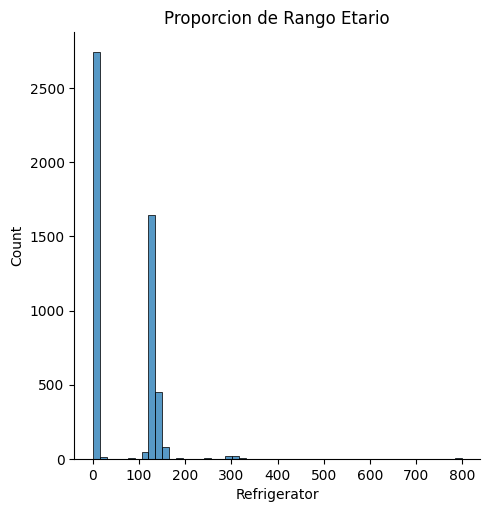

In [112]:
plt.figure()
plt.figure(figsize=(6,6))
sns.displot(x ="Refrigerator",data=dia1)
plt.title('Proporcion de Rango Etario')
plt.show()